# Example Using Emergenet
- Compares risk assesment from IRAT and risk assessment using Emergenet
- Analyzes HA and NA subsegments of A/Ohio/13/2017 (H3N2), which was evaluated by IRAT on July 2019
- Data sources:
    - IRAT (CDC): https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm#H1N2variant
    - GISAID: https://platform.epicov.org/epi3/cfrontend#586f5f
- Collected Human HA and NA strains within one year prior to IRAT analysis (July 1, 2018 - June 30, 2019)

In [1]:
%%capture
!pip install emergenet --upgrade

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from emergenet.emergenet import Enet, save_model, load_model

DATA_DIR = 'example_data/'

## HA Emergence Risk Score

In [3]:
# initialize the Enet with a sequence not currently circulating
enet_ha = Enet(seq=DATA_DIR+'ha_target_sequence.fasta', seq_trunc_length=550, random_state=42)

print('Initializing Enet with fasta file\n---------------------------------\n')
print(enet_ha.seq_metadata)
print(enet_ha.seq)
print('Length of target sequence:', len(enet_ha.seq))

Initializing Enet with fasta file
---------------------------------

A/Ohio/13/2017|A_/_H3N2|$SEGMENT_NAME|2017-07-14|EPI1056653|
MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSFSTGEICNSPYQILDGENCTLIDALLGDPQCDGFQNNKWDLFVERSKAHSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVTQDGASSSCKRRSSNSFFSRLNWLTHLNFKYPALEVTMPNNEQFDKLYIWGVHHPATDKDQISLYAQAAGRIIVSTKRNQQAVIPNIGSRPRVRDIPSRISIYWTIVRPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSACITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNIPEKQTRGIFGAIAGFIENGWEGMVDGWYGFRHQNSEGRGQAADLKSTQAAIDQINGKLNRLIGKTNEKFHQIEKEFSDVEGRIQDLEKYVEDTKIDLWSYNAELLVALENQHTIDLTDSEMNKLFEKTKKQLRENAEDMGNGCFKIYHKCDNACIGSIRNGTYDHDVYRNEALNNRFQIKGVELKSEYKDWILWISFAISCFLLCVALLGFIMWACQKGNIKCNICI
Length of target sequence: 566


In [4]:
# can also initialize with sequence rather than fasta file
enet_ha_1 = Enet(seq='MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSFSTGEICNSPYQILDGENCTLIDALLGDPQCDGFQNNKWDLFVERSKAHSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVTQDGASSSCKRRSSNSFFSRLNWLTHLNFKYPALEVTMPNNEQFDKLYIWGVHHPATDKDQISLYAQAAGRIIVSTKRNQQAVIPNIGSRPRVRDIPSRISIYWTIVRPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSACITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNIPEKQTRGIFGAIAGFIENGWEGMVDGWYGFRHQNSEGRGQAADLKSTQAAIDQINGKLNRLIGKTNEKFHQIEKEFSDVEGRIQDLEKYVEDTKIDLWSYNAELLVALENQHTIDLTDSEMNKLFEKTKKQLRENAEDMGNGCFKIYHKCDNACIGSIRNGTYDHDVYRNEALNNRFQIKGVELKSEYKDWILWISFAISCFLLCVALLGFIMWACQKGNIKCNICI',
               seq_trunc_length=550, seq_metadata='A/Ohio/13/2017|A_/_H3N2|$SEGMENT_NAME|2017-07-14|EPI1056653|', random_state=42)

print('Initializing Enet with nucleotide sequence\n------------------------------------------\n')
print(enet_ha_1.seq_metadata)
print(enet_ha_1.seq)
print('Length of target sequence:', len(enet_ha_1.seq))

Initializing Enet with nucleotide sequence
------------------------------------------

A/Ohio/13/2017|A_/_H3N2|$SEGMENT_NAME|2017-07-14|EPI1056653|
MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSFSTGEICNSPYQILDGENCTLIDALLGDPQCDGFQNNKWDLFVERSKAHSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVTQDGASSSCKRRSSNSFFSRLNWLTHLNFKYPALEVTMPNNEQFDKLYIWGVHHPATDKDQISLYAQAAGRIIVSTKRNQQAVIPNIGSRPRVRDIPSRISIYWTIVRPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSACITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNIPEKQTRGIFGAIAGFIENGWEGMVDGWYGFRHQNSEGRGQAADLKSTQAAIDQINGKLNRLIGKTNEKFHQIEKEFSDVEGRIQDLEKYVEDTKIDLWSYNAELLVALENQHTIDLTDSEMNKLFEKTKKQLRENAEDMGNGCFKIYHKCDNACIGSIRNGTYDHDVYRNEALNNRFQIKGVELKSEYKDWILWISFAISCFLLCVALLGFIMWACQKGNIKCNICI
Length of target sequence: 566


In [5]:
# load fasta data
df_ha = enet_ha.load_data(filepath=DATA_DIR+'ha_sequences.fasta', outfile=DATA_DIR+'ha_sequences.csv')

print('Number of sequences:', len(df_ha))
df_ha.head()

Number of sequences: 12389


,id,sequence
0,A/Taiwan/79440/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."
1,A/Taiwan/79440/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."
2,A/Taiwan/80749/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."
3,A/Taiwan/79429/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."
4,A/Myanmar/18M219/2018|A_/_H3N2|$SEGMENT_NAME|2...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."


In [5]:
%%time
# train qnet (automatically includes target sequence with df sequences)
qnet_ha = enet_ha.train(seq_df=df_ha, sample_size=1000, n_jobs=1)

CPU times: user 3min 21s, sys: 504 ms, total: 3min 22s
Wall time: 3min 23s


In [6]:
# save qnet
save_model(qnet=qnet_ha, outfile=DATA_DIR+'ha_qnet.joblib')

In [6]:
# load qnet
qnet_ha = load_model(filepath=DATA_DIR+'ha_qnet.joblib')

In [7]:
%%time
# compute emergence risk score
emergence_risk_score_ha, variance_ha = enet_ha.emergence_risk(seq_df=df_ha, qnet=qnet_ha, sample_size=1000)

print('Emergence Risk Score:', emergence_risk_score_ha)
print('Variance:', variance_ha)

Emergence Risk Score: 0.02119112226233963
Variance: 1.824587801130338e-05
CPU times: user 36.9 s, sys: 59.8 ms, total: 36.9 s
Wall time: 37.3 s


In [21]:
%%time
# compute emergence risk score with qsampling to get upper and lower bounds, see qsampling module
# https://zeroknowledgediscovery.github.io/quasinet/build/html/quasinet.html#quasinet.qsampling.qsample
avg_ha, min_ha, max_ha, var_ha = enet_ha.emergence_risk_qsampling(seq_df=df_ha, qnet=qnet_ha, sample_size=1000, qsamples=10, steps=10)

print('Emergence Risk Score:', avg_ha)
print('Bounds:', [min_ha, max_ha])
print('Variance:', var_ha)

Emergence Risk Score: 0.021208561494572797
Bounds: [0.02088684025877966, 0.021631276096607685]
Variance: 1.7805422211186396e-05
CPU times: user 7min 15s, sys: 202 ms, total: 7min 15s
Wall time: 7min 16s


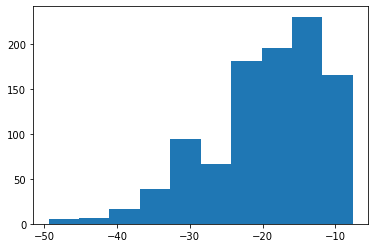

In [9]:
# visualize membership degree distribution
# https://zeroknowledgediscovery.github.io/quasinet/build/html/quasinet.html#quasinet.qnet.membership_degree
mem_ha = enet_ha.sequence_membership(seq_df=df_ha, qnet=qnet_ha, sample_size=1000)
plt.hist(mem_ha[mem_ha>-50],bins=10);

## NA Emergence Risk Score

In [10]:
# initialize the Enet with a sequence not currently circulating
enet_na = Enet(seq=DATA_DIR+'na_target_sequence.fasta', seq_trunc_length=449, random_state=42)

print('Initializing Enet with fasta file\n---------------------------------\n')
print(enet_na.seq_metadata)
print(enet_na.seq)
print('Length of target sequence:', len(enet_na.seq))

Initializing Enet with fasta file
---------------------------------

A/Ohio/13/2017|A_/_H3N2|$SEGMENT_NAME|2017-07-14|EPI1056652|
MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSPNNHVMFCEPTIIERNKTEIVYLTNTTVEKEICPKPTEYRNWSKPQCNITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDQDKCYQFALGQGTTLNNGHSNDTVHDRTPYRTLLMNELGVPFHLGTRQVCIAWSSSSCHDGKAWLHVCITGDDKNATASLIYNGRLVDSIGSWSKNILRTQESECVCINGTCTVVMTDGSASGKADTKILFIEEGKIIHISTLSGSAQHVEECSCYPRYSGVRCVCRDNWKGSNRPIVDINVKDYSTVSSYICSGLVGDTPRKNDSFSSSNCLDPNNEEGGHGVKGWAFDDGNDLWMGRTISEKSRLGYETFKVVKGWSEPNSKLQSNRQVIVDRGNRSGYSGIFSIEGKNCINRCFYVELIRGRKEETKVLWTSNSIVVFCGTSGTYGTGSWPDGADINLMPI
Length of target sequence: 469


In [11]:
# can also initialize with sequence rather than fasta file
enet_na_1 = Enet(seq='MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSPNNHVMFCEPTIIERNKTEIVYLTNTTVEKEICPKPTEYRNWSKPQCNITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDQDKCYQFALGQGTTLNNGHSNDTVHDRTPYRTLLMNELGVPFHLGTRQVCIAWSSSSCHDGKAWLHVCITGDDKNATASLIYNGRLVDSIGSWSKNILRTQESECVCINGTCTVVMTDGSASGKADTKILFIEEGKIIHISTLSGSAQHVEECSCYPRYSGVRCVCRDNWKGSNRPIVDINVKDYSTVSSYICSGLVGDTPRKNDSFSSSNCLDPNNEEGGHGVKGWAFDDGNDLWMGRTISEKSRLGYETFKVVKGWSEPNSKLQSNRQVIVDRGNRSGYSGIFSIEGKNCINRCFYVELIRGRKEETKVLWTSNSIVVFCGTSGTYGTGSWPDGADINLMPI',
                 seq_trunc_length=449, seq_metadata='A/Ohio/13/2017|A_/_H3N2|$SEGMENT_NAME|2017-07-14|EPI1056653|', random_state=42)

print('Initializing Enet with nucleotide sequence\n------------------------------------------\n')
print(enet_na_1.seq_metadata)
print(enet_na_1.seq)
print('Length of target sequence:', len(enet_na_1.seq))

Initializing Enet with nucleotide sequence
------------------------------------------

A/Ohio/13/2017|A_/_H3N2|$SEGMENT_NAME|2017-07-14|EPI1056653|
MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSPNNHVMFCEPTIIERNKTEIVYLTNTTVEKEICPKPTEYRNWSKPQCNITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDQDKCYQFALGQGTTLNNGHSNDTVHDRTPYRTLLMNELGVPFHLGTRQVCIAWSSSSCHDGKAWLHVCITGDDKNATASLIYNGRLVDSIGSWSKNILRTQESECVCINGTCTVVMTDGSASGKADTKILFIEEGKIIHISTLSGSAQHVEECSCYPRYSGVRCVCRDNWKGSNRPIVDINVKDYSTVSSYICSGLVGDTPRKNDSFSSSNCLDPNNEEGGHGVKGWAFDDGNDLWMGRTISEKSRLGYETFKVVKGWSEPNSKLQSNRQVIVDRGNRSGYSGIFSIEGKNCINRCFYVELIRGRKEETKVLWTSNSIVVFCGTSGTYGTGSWPDGADINLMPI
Length of target sequence: 469


In [12]:
# load fasta data
df_na = enet_na.load_data(filepath=DATA_DIR+'na_sequences.fasta', outfile=DATA_DIR+'na_sequences.csv')

print('Number of sequences:', len(df_na))
df_na.head()

Number of sequences: 12388


,id,sequence
0,A/Taiwan/79440/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."
1,A/Taiwan/79440/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."
2,A/Taiwan/80749/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."
3,A/Taiwan/79429/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."
4,A/Myanmar/18M219/2018|A_/_H3N2|$SEGMENT_NAME|2...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."


In [11]:
%%time
# train qnet (automatically includes target sequence with df sequences)
qnet_na = enet_na.train(seq_df=df_na, sample_size=1000, n_jobs=1)

CPU times: user 2min, sys: 247 ms, total: 2min 1s
Wall time: 2min 1s


In [12]:
# save qnet
save_model(qnet=qnet_na, outfile=DATA_DIR+'na_qnet.joblib')

In [13]:
# load qnet
qnet_na = load_model(filepath=DATA_DIR+'na_qnet.joblib')

In [14]:
%%time
# compute emergence risk score
emergence_risk_score_na, variance_na = enet_na.emergence_risk(seq_df=df_na, qnet=qnet_na, sample_size=1000)

print('Emergence Risk Score:', emergence_risk_score_na)
print('Variance:', variance_na)

Emergence Risk Score: 0.03134153156313303
Variance: 1.1981003862313043e-05
CPU times: user 29.4 s, sys: 20.8 ms, total: 29.4 s
Wall time: 29.4 s


In [22]:
%%time
# compute emergence risk score with qsampling to get upper and lower bounds, see qsampling module
# https://zeroknowledgediscovery.github.io/quasinet/build/html/quasinet.html#quasinet.qsampling.qsample
avg_na, min_na, max_na, var_na = enet_na.emergence_risk_qsampling(seq_df=df_na, qnet=qnet_na, sample_size=1000, qsamples=10, steps=10)

print('Emergence Risk Score:', avg_na)
print('Bounds:', [min_na, max_na])
print('Variance:', var_na)

Emergence Risk Score: 0.03134277509057835
Bounds: [0.031008088966072118, 0.031690064461674265]
Variance: 1.1733016310633312e-05
CPU times: user 5min 17s, sys: 88 ms, total: 5min 17s
Wall time: 5min 19s


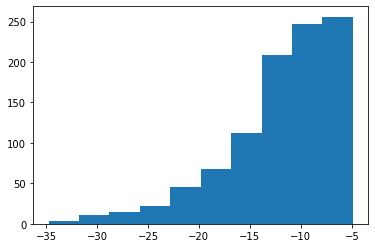

In [20]:
# visualize membership degree distribution
# https://zeroknowledgediscovery.github.io/quasinet/build/html/quasinet.html#quasinet.qnet.membership_degree
mem_na = enet_na.sequence_membership(seq_df=df_na, qnet=qnet_na, sample_size=1000)
plt.hist(mem_na[mem_na>-35],bins=10);

## Average Emergence Risk Score
- Emergence risk scores should match values in SI-Table 16 (with some variation due to sampling differences in training Qnet)

In [17]:
# compute average emergence risk (recall we used 1000 samples in each)
emergence_risk_score_avg = (emergence_risk_score_ha * 1000 + emergence_risk_score_na * 1000)/2000

print('Emergenet potential emergence estimate:', round(emergence_risk_score_avg, 6))
print('IRAT potential emergence estimate: 6.6')

Emergenet potential emergence estimate: 0.026266
IRAT potential emergence estimate: 6.6
